Matplotlib is building the font cache; this may take a moment.


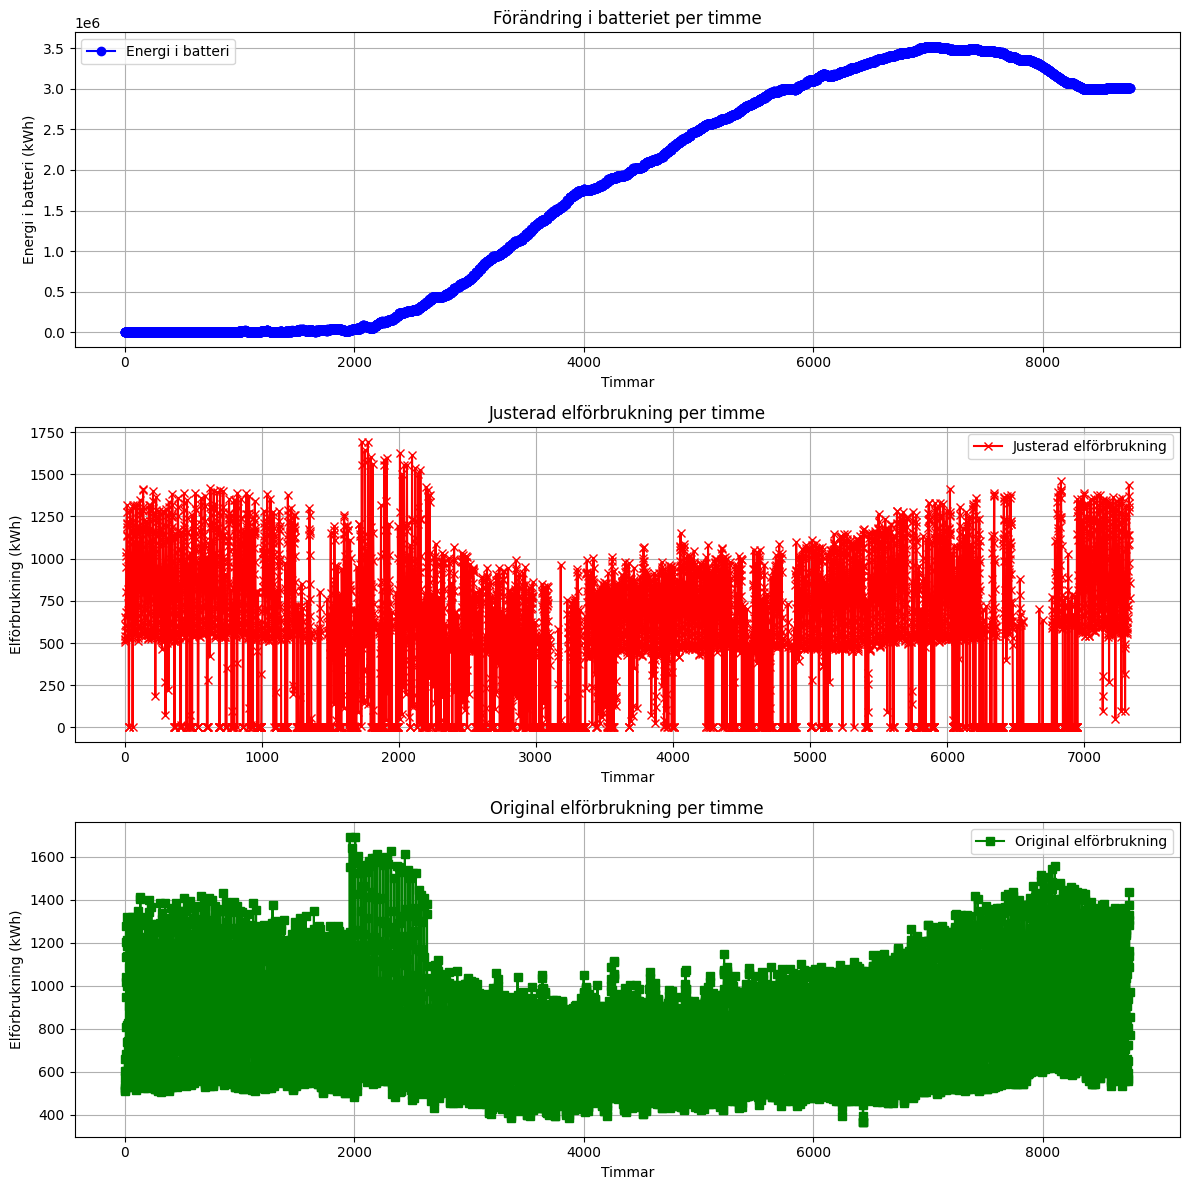

Summa Spotpris 2023: 5689306.300100008
Summa spotpris köpt el med batteri:  [1997161.21624799]
Besparingar i spotpris(i kr)m.h.a sol och batteri: [3692145.08385201]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel files
Solprod = pd.read_excel("SolprodABK.xlsx")
ABKEl = pd.read_excel("ABKEL.xlsx")
Spotpris = pd.read_excel("Spotpris.xlsx")

# Extract first columns from each
Sol = Solprod.iloc[:, 0]  # First column of Solprod
ABK = ABKEl.iloc[:, 0]    # First column of ABKEl
Spot = Spotpris.iloc[:, 0]    # First column of Spotpris

# Initialize Batteri
batteriKapacitet = 0.0
KöptElSpotpris = 0.0
SummaSpotpris2023 = 0.0

for i in range(len(Spot)):
    SummaSpotpris2023 += Spot[i]*ABK[i]

SummaSpotpris2023 = SummaSpotpris2023/100


# List to store battery and elförbrukning for plotting
elförbrukning = []
battery_values = []
original_consumption = ABK.tolist()

# Iterate through the columns
for i in range(len(Sol)):
    diff = ABK[i] - Sol[i] #Differens elförbrukning solproduktion varje timme

    # Update Batteri based on the conditions
    if  Spot[i] <= 35 and Sol[i] > 0: #Lagra solel om spotpris är lägre än 35 öre/kWh
        batteriKapacitet += Sol[i]
        KöptElSpotpris += (Spot[i]*ABK[i]) #Spotpris per kWh el läggs till i summa
        elförbrukning.append(ABK[i])
    elif Spot[i] > 35 and Spot[i] < 100 and Sol[i] > 0 and diff > 0: #Om spotpriset är större än 35, men mindre än 100, och sol-el finns men elförbr. större
        KöptElSpotpris += [Spot[i]*diff] #Differensen el köps i spotpris och läggs till i summa
        elförbrukning.append(diff)
    elif Spot[i] >= 100 and Sol[i] > 0 and diff > 0 and batteriKapacitet > 0: #Om spotpriset är större än 100 och solprod och batteriel finns
        energiFrånBatteri = min(batteriKapacitet, diff) #Tar minsta värdet mellan energin i batteriet och diff
        batteriKapacitet -= energiFrånBatteri #Subtraherar energifrån batteriet
        KöptElSpotpris += (diff - energiFrånBatteri)*Spot[i] #Köper restel, om "diff" är större än "batteriKapacitet"
        elförbrukning.append(diff- energiFrånBatteri)
    elif Spot[i] > 35 and Sol[i] > 0 and diff < 0: #Om spotpris är större än 35 öre och solel finns och är större än elförbrukning
        batteriKapacitet += (-1*diff) #Lagra solelöverskottet
    elif Sol[i] == 0 and batteriKapacitet > 0 and Spot[i] >= 100: #Om ingen solel och spotpriset är högre än 100 öre och batteriel finns
        energiFrånBatteri = min(batteriKapacitet, ABK[i]) #Tar lägsta värdet mellan elförbr. för timmen och energisumman i batteriet, säkerställer att batteriet aldrig blir negativt
        batteriKapacitet -= energiFrånBatteri #Subtraherar energi från batteriet
        KöptElSpotpris += (ABK[i] - energiFrånBatteri)*Spot[i] #Köper restelen (Om elförbrukningen blir minsta köps alltså ingen, ABK[i]-ABK[i])
        elförbrukning.append(ABK[i]- energiFrånBatteri)
    else: 
        KöptElSpotpris += (ABK[i]*Spot[i]) #I alla andra fall köps elen till spotpris
        elförbrukning.append(ABK[i])


 # Store the updated Batteri value for plotting
    battery_values.append(batteriKapacitet)


# Create subplots to display three graphs
fig, ax = plt.subplots(3, 1, figsize=(12, 12))  # 3 rows, 1 column

# Plot Battery Energy
ax[0].plot(range(len(battery_values)), battery_values, label='Energi i batteri', color='blue', marker='o')
ax[0].set_xlabel('Timmar')
ax[0].set_ylabel('Energi i batteri (kWh)')
ax[0].set_title('Förändring i batteriet per timme')
ax[0].legend()
ax[0].grid(True)

# Plot Adjusted Electricity Consumption
ax[1].plot(range(len(elförbrukning)), elförbrukning, label='Justerad elförbrukning', color='red', marker='x')
ax[1].set_xlabel('Timmar')
ax[1].set_ylabel('Elförbrukning (kWh)')
ax[1].set_title('Justerad elförbrukning per timme')
ax[1].legend()
ax[1].grid(True)

# Plot Original Electricity Consumption (ABK)
ax[2].plot(range(len(original_consumption)), original_consumption, label='Original elförbrukning', color='green', marker='s')
ax[2].set_xlabel('Timmar')
ax[2].set_ylabel('Elförbrukning (kWh)')
ax[2].set_title('Original elförbrukning per timme')
ax[2].legend()
ax[2].grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

köptEliKr = KöptElSpotpris/100
# Printar summan spotpris och jämför med originalpriset
print("Summa Spotpris 2023:", SummaSpotpris2023)
print("Summa spotpris köpt el med batteri: ", köptEliKr)
print("Besparingar i spotpris(i kr)m.h.a sol och batteri:", SummaSpotpris2023 - köptEliKr)

Original elförbrukning topptimmar:     Timme  Elförbrukning
0    2008        1693.00
1    1960        1693.00
2    1984        1641.00
3    2321        1627.00
4    2201        1614.00
5    2441        1611.00
6    2032        1602.00
7    2273        1596.00
8    2177        1594.00
9    2152        1593.00
10   2009        1586.00
11   2128        1580.00
12   2225        1576.00
13   1985        1571.00
14   2129        1570.00
15   2297        1567.00
16   2249        1563.00
17   2056        1561.00
18   8104        1555.75
19   2153        1555.00
20   2369        1554.00
21   2081        1553.00
22   1961        1553.00
23   2393        1552.00
24   8080        1541.25
25   2465        1537.00
26   2104        1534.00
27   2417        1530.00
28   2105        1529.00
29   2537        1526.00
De 30 högsta elförbrukningsvärdena och deras timmar i Excel-filen:
1. Timme 2152  - Förbrukning: 1587.656 (Excel rad: 2160)
2. Timme 2128  - Förbrukning: 1580.0 (Excel rad: 2136)
3. Timme 21

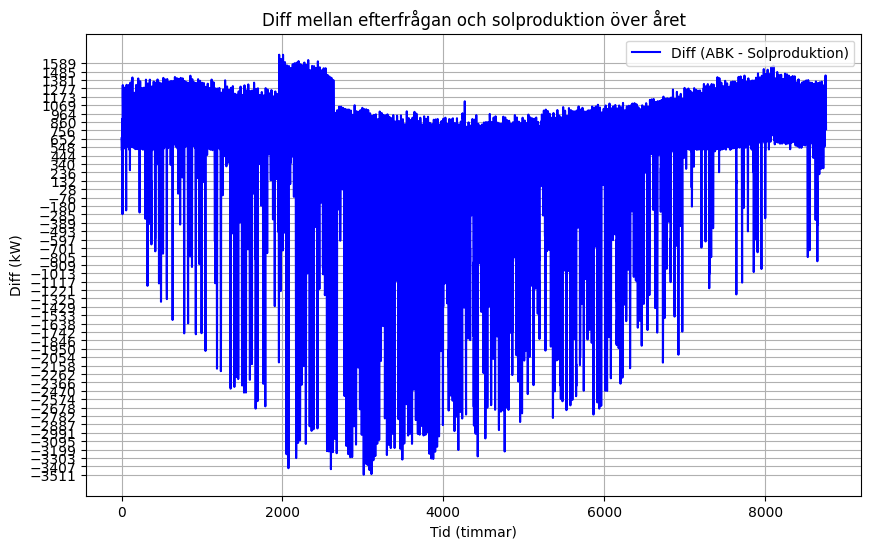


--- År 1 Slut ---
Batterienergi kvar vid årets slut: 5000 kWh
Summa spotpris köpt el med batteri år 1: 3462578.0046665543
Besparingar i spotpris år 1: 2226728.295433447

--- År 2 Slut ---
Batterienergi kvar vid årets slut: 5000 kWh
Summa spotpris köpt el med batteri år 2: 3522535.586994801
Besparingar i spotpris år 2: 2166770.7131052003


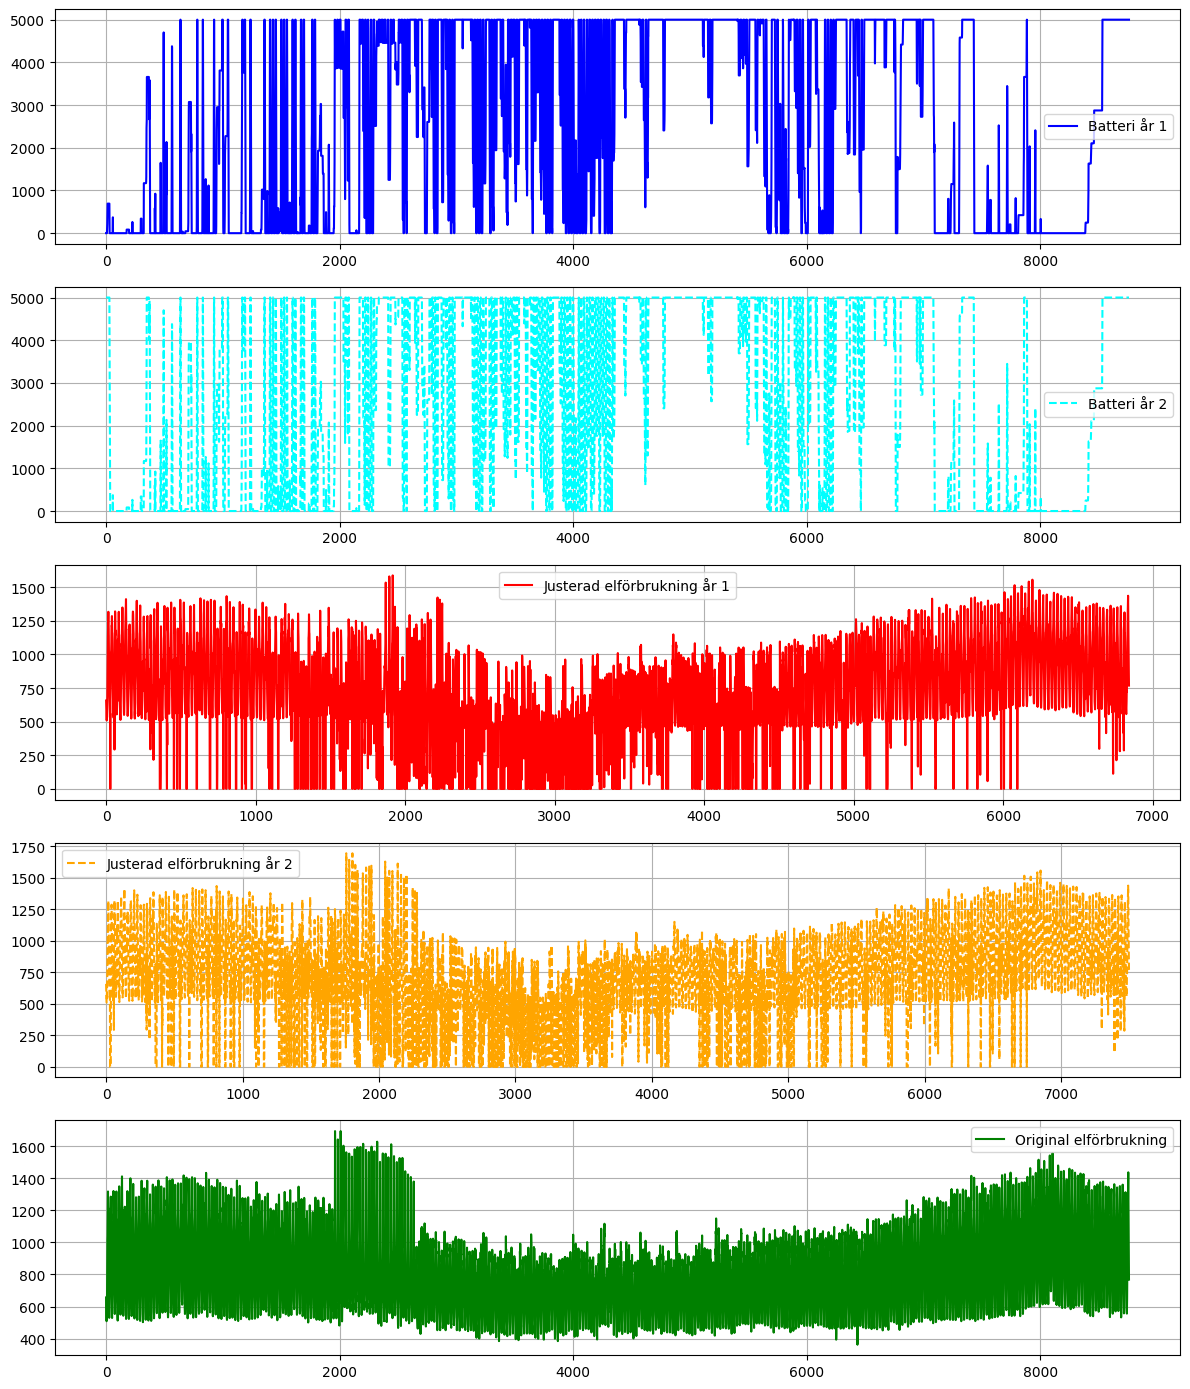

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the Excel files
Solprod = pd.read_excel("SolprodABK.xlsx")
ABKEl = pd.read_excel("ABKEL.xlsx")
Spotpris = pd.read_excel("Spotpris.xlsx")

# Extract first columns from each
Sol = Solprod.iloc[:, 0] * 0.8  # Solar production with estimation of 80 % of roof can be covered with solar panels
ABK = ABKEl.iloc[:, 0]    # Electricity consumption
Spot = Spotpris.iloc[:, 0]  # Spot price

# Ta fram elförbrukning (första kolumnen) som en Pandas Series
elförbrukning = pd.Series(ABKEl.iloc[:, 0])


# Sortera elförbrukningen i fallande ordning och hämta de 30 högsta värdena
top_30_hours = elförbrukning.sort_values(ascending=False).head(30)

# Skapa en DataFrame med radnummer (index) och värde (elförbrukning)
top_30_with_index = top_30_hours.reset_index()

# Byt namn på kolumnerna för bättre läsbarhet
top_30_with_index.columns = ['Timme', 'Elförbrukning']

# Skriv ut de 30 timmarna med högst elförbrukning och radnummer
print("Original elförbrukning topptimmar: " + top_30_with_index.to_string())

# Initialize Battery and Costs
batteriKapacitet = 0.0  # Start with an empty battery
batteriMaxKapacitet = 5000  # Max battery capacity in kWh
maxFrånBatteri = 1500

#Variabler som används i if-satser för kontroll av extremvärden av effekttopparna
maxförbrukning_för_lagring = 1480

hög_efterfrågan_gräns = 1480

medelhög_efterfrågan_gräns = 1400

# Total spot price without battery
SummaSpotpris2023 = (Spot * ABK).sum() / 100

# Lists to store values for plotting
elförbrukning = []  # Adjusted electricity consumption for Year 1
elförbrukning_index = [] #för att hålla rätt på indexeringen
timme = 0
battery_values = []  # Battery energy over time
original_consumption = ABK.tolist()  # Convert ABK to list for original consumption

# ----------------------- YEAR 1 SIMULATION -----------------------
KöptElSpotpris = 0.0  # Reset cost for Year 1


for sol, abk, spot in zip(Sol, ABK, Spot):
    diff = abk - sol  # Difference between consumption and solar production

    # Dynamisk justering av kapningsfaktor beroende på efterfrågan
    if diff > hög_efterfrågan_gräns:  # Om efterfrågan är extremt hög
        faktor = 0.35  # Aggressiv kapning vid extrema toppar
    elif diff > medelhög_efterfrågan_gräns:  # Om efterfrågan är måttligt hög
        faktor = 0.15  # Medelhög kapning
    else:  # Om efterfrågan är låg
        faktor = 0.1  # Mjukare kapning vid normal efterfrågan

    # Update battery and electricity cost based on conditions
    if spot <= 35 and sol > 0 and diff >= 0 and abk < maxförbrukning_för_lagring:  # Store solar energy when spot price is low
        batteriKapacitet = min(batteriKapacitet + sol, batteriMaxKapacitet)
        KöptElSpotpris += spot * abk
        elförbrukning.append(abk)
        elförbrukning_index.append(timme)  # Spara den ursprungliga timmen
    elif spot <= 35  and sol > 0 and abk >= maxförbrukning_för_lagring:
        energiFrånBatteri = min(batteriKapacitet * faktor, diff * faktor, maxFrånBatteri)
        batteriKapacitet -= energiFrånBatteri
        KöptElSpotpris += (diff - energiFrånBatteri) * spot
        elförbrukning.append(diff - energiFrånBatteri)
        elförbrukning_index.append(timme)  # Spara den ursprungliga timmen
    elif 35 < spot < 100  and abk >= maxförbrukning_för_lagring:
        energiFrånBatteri = min(batteriKapacitet * faktor, diff * faktor, maxFrånBatteri)
        batteriKapacitet -= energiFrånBatteri
        KöptElSpotpris += (diff - energiFrånBatteri) * spot
        elförbrukning.append(diff - energiFrånBatteri)
        elförbrukning_index.append(timme)  # Spara den ursprungliga timmen    
    elif spot <= 35  and diff < 0 and abk < maxförbrukning_för_lagring:
        batteriKapacitet = min(batteriKapacitet + (-diff), batteriMaxKapacitet)
    elif 35 < spot < 100 and sol > 0 and diff > 0:
        KöptElSpotpris += spot * diff
        elförbrukning.append(diff)
        elförbrukning_index.append(timme)  # Spara den ursprungliga timmen
    elif 35 < spot < 100 and sol > 0 and diff > 0 and abk < maxförbrukning_för_lagring:
        energiFrånBatteri = min(batteriKapacitet, diff, maxFrånBatteri)
        batteriKapacitet -= energiFrånBatteri
        KöptElSpotpris += (diff - energiFrånBatteri) * spot
        elförbrukning.append(diff - energiFrånBatteri)
        elförbrukning_index.append(timme)  # Spara den ursprungliga timmen 
    elif spot >= 100 and sol > 0 and diff > 0 and batteriKapacitet > 0 and abk < maxförbrukning_för_lagring:
        energiFrånBatteri = min(batteriKapacitet, diff, maxFrånBatteri)
        batteriKapacitet -= energiFrånBatteri
        KöptElSpotpris += (diff - energiFrånBatteri) * spot
        elförbrukning.append(diff - energiFrånBatteri)
        elförbrukning_index.append(timme)  # Spara den ursprungliga timmen
    elif spot >= 100 and sol > 0 and diff > 0 and batteriKapacitet > 0 and abk > maxförbrukning_för_lagring:   
        energiFrånBatteri = min(batteriKapacitet * faktor, diff * faktor, maxFrånBatteri)
        batteriKapacitet -= energiFrånBatteri
        KöptElSpotpris += (diff - energiFrånBatteri) * spot
        elförbrukning.append(diff - energiFrånBatteri)
        elförbrukning_index.append(timme)  # Spara den ursprungliga timmen
    elif spot > 35 and sol > 0 and diff < 0:
        batteriKapacitet = min(batteriKapacitet + (-diff), batteriMaxKapacitet)
    elif sol == 0 and batteriKapacitet > 0 and spot >= 100 and abk < maxförbrukning_för_lagring:
        energiFrånBatteri = min(batteriKapacitet, abk, maxFrånBatteri)
        batteriKapacitet -= energiFrånBatteri
        KöptElSpotpris += (abk - energiFrånBatteri) * spot
        elförbrukning.append(max(0, abk - energiFrånBatteri))
        elförbrukning_index.append(timme)  # Spara den ursprungliga timmen
    elif sol == 0 and batteriKapacitet > 0 and spot >= 100 and abk > maxförbrukning_för_lagring:
        energiFrånBatteri = min(batteriKapacitet * faktor, abk, maxFrånBatteri)
        batteriKapacitet -= energiFrånBatteri
        KöptElSpotpris += (abk - energiFrånBatteri) * spot
        elförbrukning.append(max(0, abk - energiFrånBatteri))
        elförbrukning_index.append(timme)  # Spara den ursprungliga timmen
    else:
        KöptElSpotpris += abk * spot
        elförbrukning.append(abk)
        elförbrukning_index.append(timme)  # Spara den ursprungliga timmen
       
    battery_values.append(batteriKapacitet)
    timme += 1

# Konvertera elförbrukning till en NumPy-array
elförbrukning_array = np.array(elförbrukning)
elförbrukning_index_array = np.array(elförbrukning_index)  # Skapa array av index

# Hitta de 30 högsta värdena i elförbrukning
top_30_indices = np.argsort(elförbrukning_array)[-30:]  # Index för de 30 största värdena
top_30_values = elförbrukning_array[top_30_indices]  # Hämta värdena
top_30_original_times = elförbrukning_index_array[top_30_indices]  # Hämta originaltimmar

# Sortera topp 30 i fallande ordning och behåll index
sorted_pairs = sorted(zip(top_30_values, top_30_original_times), reverse=True)

# Skriv ut de 30 högsta värdena tillsammans med originaltimmarna
print("De 30 högsta elförbrukningsvärdena och deras timmar i Excel-filen:")

for i, (value, original_time) in enumerate(sorted_pairs):
    excel_rad = original_time + 8  # +8 för att Excel har rubrikrad och 1-baserade index
    print(f"{i+1}. Timme {original_time}  - Förbrukning: {value} (Excel rad: {excel_rad})")


# Skapa tomma listor för att lagra timmar och diff-värden
timmar = []
diff_lista = []

# Din stora for-loop där du beräknar diff och andra parametrar
for timme, (sol, abk, spot) in enumerate(zip(Sol, ABK, Spot)):
    diff = abk - sol  # Skillnaden mellan efterfrågan och solproduktion
    
    timmar.append(timme)  # Lägg till timme
    diff_lista.append(diff)  # Lägg till diff-värdet

    # Här kan du ha dina if-satser och logik som tidigare
    # (För att hantera batteriladdning, elköp etc.)

# Nu när for-loopen har körts klart, skapa plottningen en gång.
plt.figure(figsize=(10, 6))
plt.plot(timmar, diff_lista, label="Diff (ABK - Solproduktion)", color='blue')
plt.xlabel("Tid (timmar)")
plt.ylabel("Diff (kW)")
plt.title("Diff mellan efterfrågan och solproduktion över året")
plt.grid(True)
plt.legend()

# Justera y-axelns intervall
min_diff = min(diff_lista)
max_diff = max(diff_lista)
tick_interval = (max_diff - min_diff) / 50  # Dela upp i 10 sektioner (justera om behövs)

plt.yticks(np.arange(min_diff, max_diff, tick_interval))  # Sätt tickvärden

plt.show()

# Store battery energy left after year 1
battery_energy_end_of_year1 = batteriKapacitet
köptEliKr_år1 = KöptElSpotpris / 100
besparingar_år1 = SummaSpotpris2023 - köptEliKr_år1

print("\n--- År 1 Slut ---")
print("Batterienergi kvar vid årets slut:", battery_energy_end_of_year1, "kWh")
print("Summa spotpris köpt el med batteri år 1:", köptEliKr_år1)
print("Besparingar i spotpris år 1:", besparingar_år1)

# ----------------------- YEAR 2 SIMULATION -----------------------
batteriKapacitet = battery_energy_end_of_year1  # Start Year 2 with leftover battery energy
KöptElSpotpris = 0.0  # Reset for Year 2
elförbrukning_year2 = []
battery_values_year2 = []

for sol, abk, spot in zip(Sol, ABK, Spot):
    diff = abk - sol

    if spot <= 35 and sol > 0:
        batteriKapacitet = min(batteriKapacitet + sol, batteriMaxKapacitet)
        KöptElSpotpris += spot * abk
        elförbrukning_year2.append(abk)
    elif 35 < spot < 100 and sol > 0 and diff > 0:
        KöptElSpotpris += spot * diff
        elförbrukning_year2.append(diff)
    elif spot >= 100 and sol > 0 and diff > 0 and batteriKapacitet > 0:
        energiFrånBatteri = min(batteriKapacitet, diff, maxFrånBatteri)
        batteriKapacitet -= energiFrånBatteri
        KöptElSpotpris += (diff - energiFrånBatteri) * spot
        elförbrukning_year2.append(diff - energiFrånBatteri)
    elif spot > 35 and sol > 0 and diff < 0:
        batteriKapacitet = min(batteriKapacitet + (-diff), batteriMaxKapacitet)
    elif sol == 0 and batteriKapacitet > 0 and spot >= 100:
        energiFrånBatteri = min(batteriKapacitet, abk, maxFrånBatteri)
        batteriKapacitet -= energiFrånBatteri
        KöptElSpotpris += (abk - energiFrånBatteri) * spot
        elförbrukning_year2.append(max(0, abk - energiFrånBatteri))
    else:
        KöptElSpotpris += abk * spot
        elförbrukning_year2.append(abk)

    battery_values_year2.append(batteriKapacitet)

köptEliKr_år2 = KöptElSpotpris / 100
besparingar_år2 = SummaSpotpris2023 - köptEliKr_år2

print("\n--- År 2 Slut ---")
print("Batterienergi kvar vid årets slut:", batteriKapacitet, "kWh")
print("Summa spotpris köpt el med batteri år 2:", köptEliKr_år2)
print("Besparingar i spotpris år 2:", besparingar_år2)

# ----------------------- PLOTTING RESULTS -----------------------
fig, ax = plt.subplots(5, 1, figsize=(12, 14))

ax[0].plot(battery_values, label='Batteri år 1', color='blue')
ax[1].plot(battery_values_year2, label='Batteri år 2', color='cyan', linestyle='dashed')
ax[2].plot(elförbrukning, label='Justerad elförbrukning år 1', color='red')
ax[3].plot(elförbrukning_year2, label='Justerad elförbrukning år 2', color='orange', linestyle='dashed')
ax[4].plot(original_consumption, label='Original elförbrukning', color='green')

for a in ax:
    a.legend()
    a.grid(True)

plt.tight_layout()
plt.show()

